## Plotting regular waves per probe per file

In [448]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [449]:
def plot_period(frequency, amplitude,period,shift):
    data_list = [["time"],["Probe 1"],["Probe 2"],["Probe 3"], ["Probe 4"], ["Probe 5"]]
    freq = str(frequency).replace(".","")
    filename = "F" + freq + "A" + str(amplitude)
    with open('../Experimental Data-20201218/' + filename + ".txt") as txt:
        rows = txt.readlines()
        time_period = int(len(rows)/2)
        current = 0
        zeroes = 0
        while zeroes < 3 and time_period < len(rows):
            last = current
            row_list = rows[time_period].strip().split(" ")
            current = float(rows[time_period].strip().split(" ")[3])
            if (current == 0) or (current > 0 and last < 0) or (current < 0 and last > 0):
                if shift:
                    shift = False
                else:
                    zeroes += 1
            if zeroes > 0:
                data_list[0].append(float(row_list[0])/period)
                data_list[3].append(float(row_list[3])/amplitude)
            time_period += 1
        subtractee = data_list[0][1]
        for i in range(1,len(data_list[0])):
            data_list[0][i] = data_list[0][i] - subtractee
    return data_list

In [450]:
wave1 = plot_period(0.5,4,2,False)
wave2 = plot_period(1.0,3,1,True)
wave3 = plot_period(1.5,2,0.667,True)

In [ ]:
sine_wave = ["sine wave"]
for i in range(1,len(wave1[0])):
    sine_wave.append(np.sin(2*np.pi*(float(wave1[0][i]))))

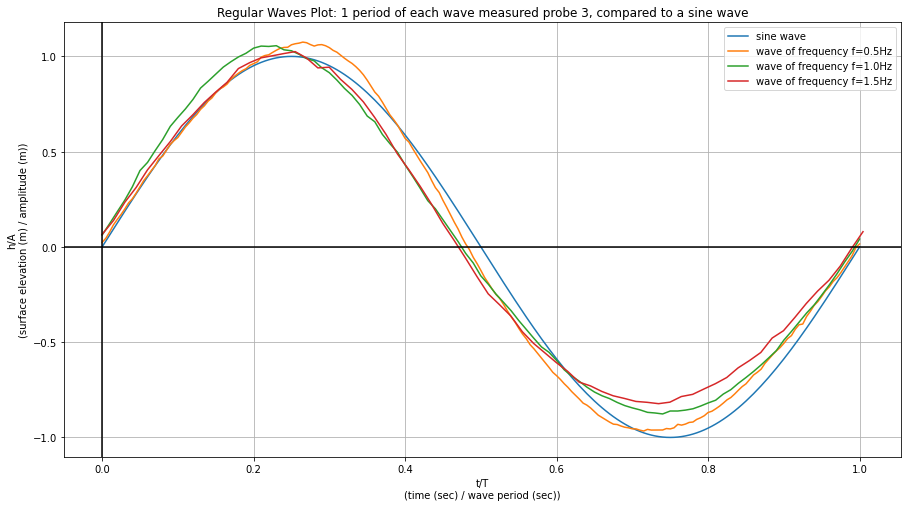

In [452]:
plt.figure(figsize=(15,8))
plt.title("Regular Waves Plot: 1 period of each wave measured probe 3, compared to a sine wave")
plt.xlabel("t/T\n(time (sec) / wave period (sec))")
plt.ylabel("h/A\n(surface elevation (m) / amplitude (m))")
plt.plot(wave1[0][1:],sine_wave[1:],label=sine_wave[0])
plt.plot(wave1[0][1:],wave1[3][1:],label="wave of frequency f=0.5Hz")
plt.plot(wave2[0][1:],wave2[3][1:],label="wave of frequency f=1.0Hz")
plt.plot(wave3[0][1:],wave3[3][1:],label="wave of frequency f=1.5Hz")
plt.legend()
plt.grid(True, which='both')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.savefig("../graphs/Probe3.png")
plt.show()